In [31]:
# data organization libraries
import numpy as np
import pandas as pd

# data visualization libraries
import plotly.express as px
import matplotlib.pyplot as plt

# modeling libraries
import sklearn as sk


In [32]:
# get raw data

fire_df = pd.read_csv('clean_fires.csv')

fire_df.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [33]:
len(fire_df)

512

In [34]:
mons = fire_df['month'].value_counts()

In [35]:
mons.head()



8    184
9    172
3     54
7     32
2     20
Name: month, dtype: int64

In [36]:
aug_fires = fire_df[fire_df['month'] == 8]

aug_fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
5,8,6,8,0,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,8,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,8,1,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
12,6,5,8,5,63.5,70.8,665.3,0.8,17.0,72,6.7,0.0,0.0
23,7,4,8,6,90.2,110.9,537.4,6.2,19.5,43,5.8,0.0,0.0


In [37]:
len(aug_fires)

184

In [38]:
samp = aug_fires.sample(n=60)

samp.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
402,2,2,8,2,94.6,212.1,680.9,9.5,27.9,27,2.2,0.0,0.00
260,3,4,8,5,91.6,112.4,573.0,8.9,11.2,84,7.6,0.0,3.30
257,3,4,8,6,91.8,170.9,692.3,13.7,20.6,59,0.9,0.0,0.00
375,2,2,8,6,93.7,231.1,715.1,8.4,21.9,42,2.2,0.0,174.63
23,7,4,8,6,90.2,110.9,537.4,6.2,19.5,43,5.8,0.0,0.00


In [39]:
len(samp)

60

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>],
       [<AxesSubplot:title={'center':'area'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

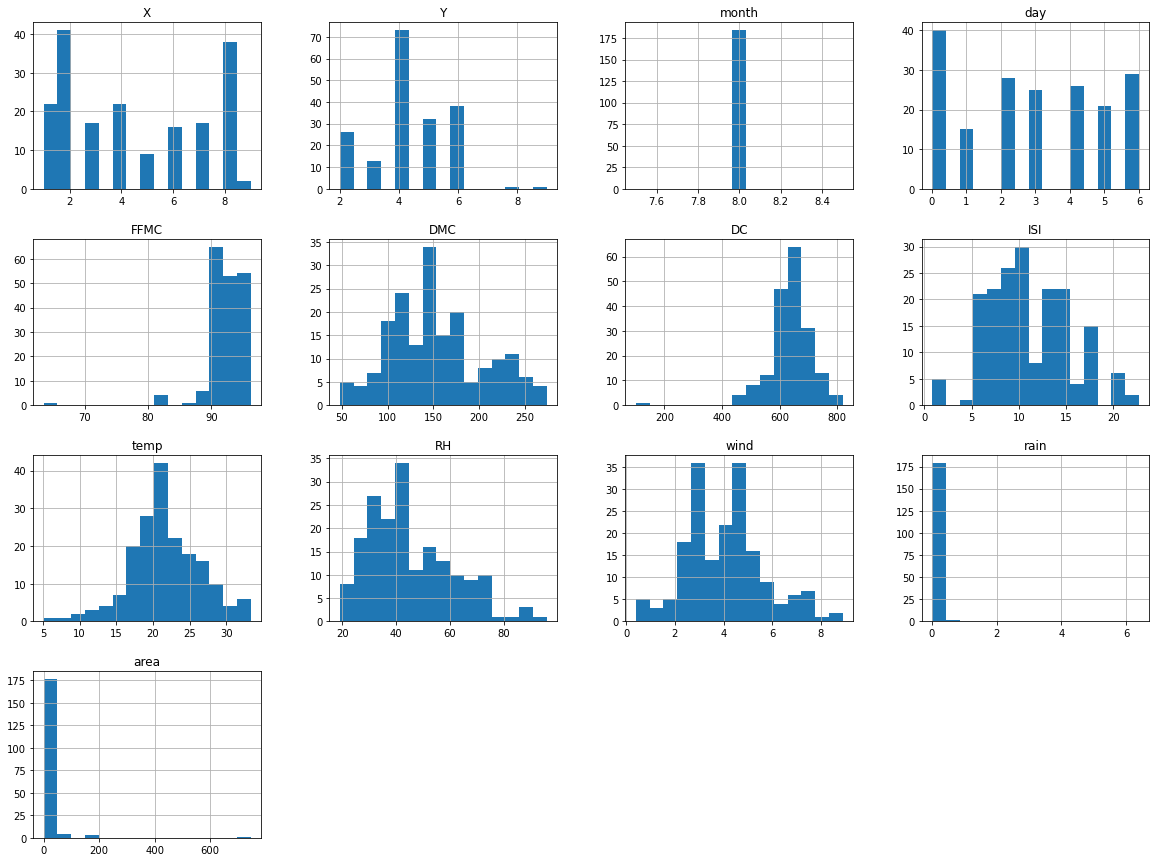

In [40]:
aug_fires.hist(bins=15, figsize=(20,15))

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>],
       [<AxesSubplot:title={'center':'area'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

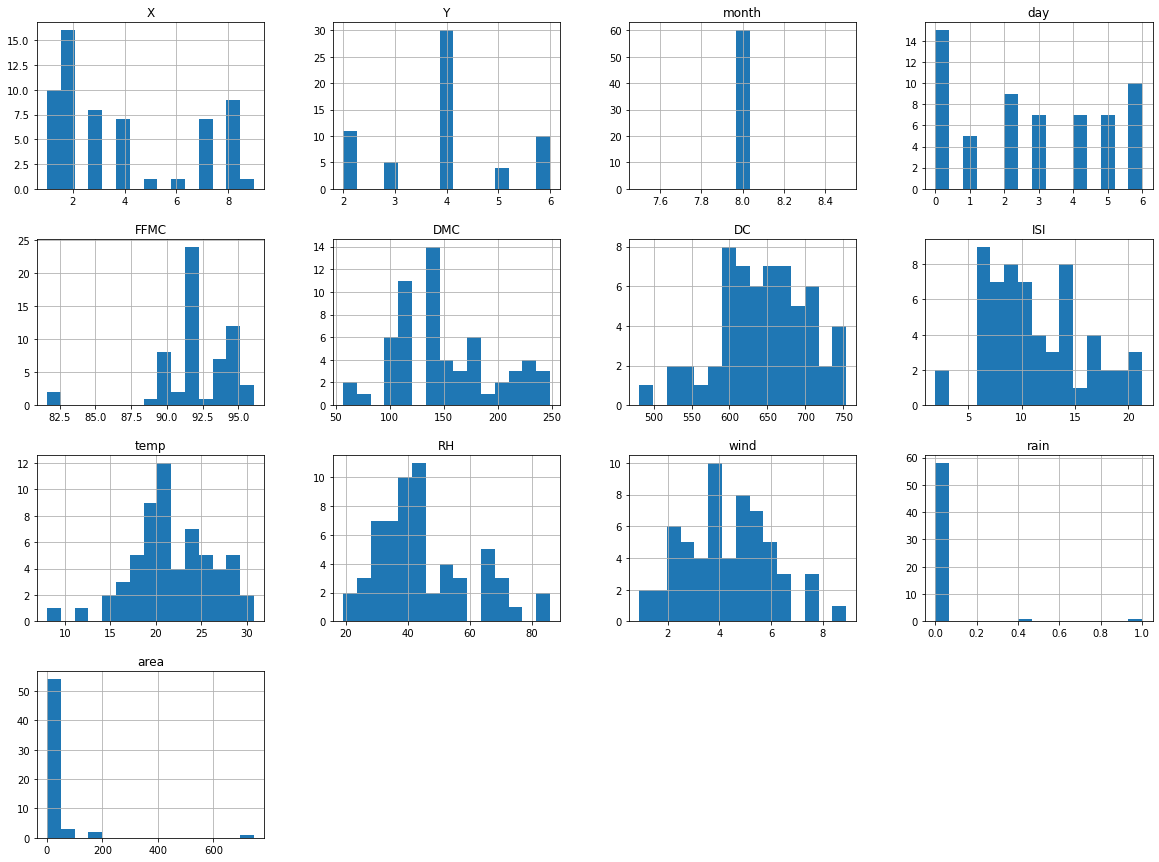

In [41]:
samp.hist(bins=15, figsize=(20,15))

In [42]:
mon_index =[8, 9, 3, 7, 2, 6, 10, 12, 4]

sample_list = [61, 57, 18, 11, 7, 6, 5, 3, 3]

In [43]:
def generate_month_sample(df, month, num_samples, rand_s):
    
    month_df = df[df['month'] == month]
    
    return month_df.sample(n=num_samples, random_state=rand_s)


In [44]:
def generate_year_sample(df, num_sample_list, index_list, rs):
    
    final_df = pd.DataFrame()
    
    dex = range(len(index_list))
    
    
    
    for i in dex:
        
        if i == 0:
            
            final_df = generate_month_sample(df, index_list[i], num_sample_list[i], rs)
        else:
            
            final_df = pd.concat([final_df, generate_month_sample(df, index_list[i], num_sample_list[i], rs)])
    
    return final_df
        
        

In [45]:
one_yr = generate_year_sample(fire_df, sample_list, mon_index)

one_yr.head()

TypeError: generate_year_sample() missing 1 required positional argument: 'rs'

In [ ]:
len(one_yr)

In [ ]:
one_yr.hist(bins=15, figsize=(20,15))

In [ ]:
fire_df.hist(bins=15, figsize=(20,15))

In [ ]:
# now that we have our sampling function, lets start to create our final: train, validation, 
# and test sets. The data will be sampled in such a way that students models will be more
# accurate on the validation sets, which will be samples of the final test set, if they select
# the best features from the train set.


In [ ]:
# final data sets v1

In [ ]:
# gen train
# description: fictional yearly data from 2000-2016
# 1. 2720 rows (680 * 4)
# 2. strait rand samp (prob)
# 3. students will discover true model through EDA and validation
# 4. Main Idea, if a student trains their model on data that is more similar to final test set
# then they will have a higher accuracy on their kaggle submission, and use test/val/train to 
# earn their grade.

In [ ]:
rand_states = dict.fromkeys([1, 2, 3], 10)

rand_states

In [ ]:
myDict = {
  **dict.fromkeys([1, 2, 3, 4], 1), 
  **dict.fromkeys([5, 6, 7, 8], 2),
  **dict.fromkeys([9, 10, 11, 12], 3),
  **dict.fromkeys([13, 14, 15, 16], 4),
}

myDict

In [ ]:
myDict[9]

In [ ]:
#def add_yr_label(df, label)

In [50]:
def gen_train_data(df, sam_nums, dex, rand_state):
    
    train = pd.DataFrame()
    
    yrs = 16
    
    while yrs > 0:
        
        state = rand_state[yrs]
        
        curr_yr = generate_year_sample(df, sam_nums, dex, state)
        
        train = pd.concat([train, curr_yr])
        
        yrs-=1
    
    return train
    
    
    

In [51]:
train_df = gen_train_data(fire_df, sample_list, mon_index, myDict)

train_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
504,1,2,8,5,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00
483,5,4,8,2,95.1,141.3,605.8,17.7,26.4,34,3.6,0.0,16.40
165,6,5,8,3,92.1,111.2,654.1,9.6,16.6,47,0.9,0.0,2.29
253,6,3,8,4,91.6,138.1,621.7,6.3,18.9,41,3.1,0.0,10.34
106,4,5,8,0,90.2,99.6,631.2,6.3,21.4,33,3.1,0.0,0.00


In [52]:
len(train_df)

2736

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>],
       [<AxesSubplot:title={'center':'area'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

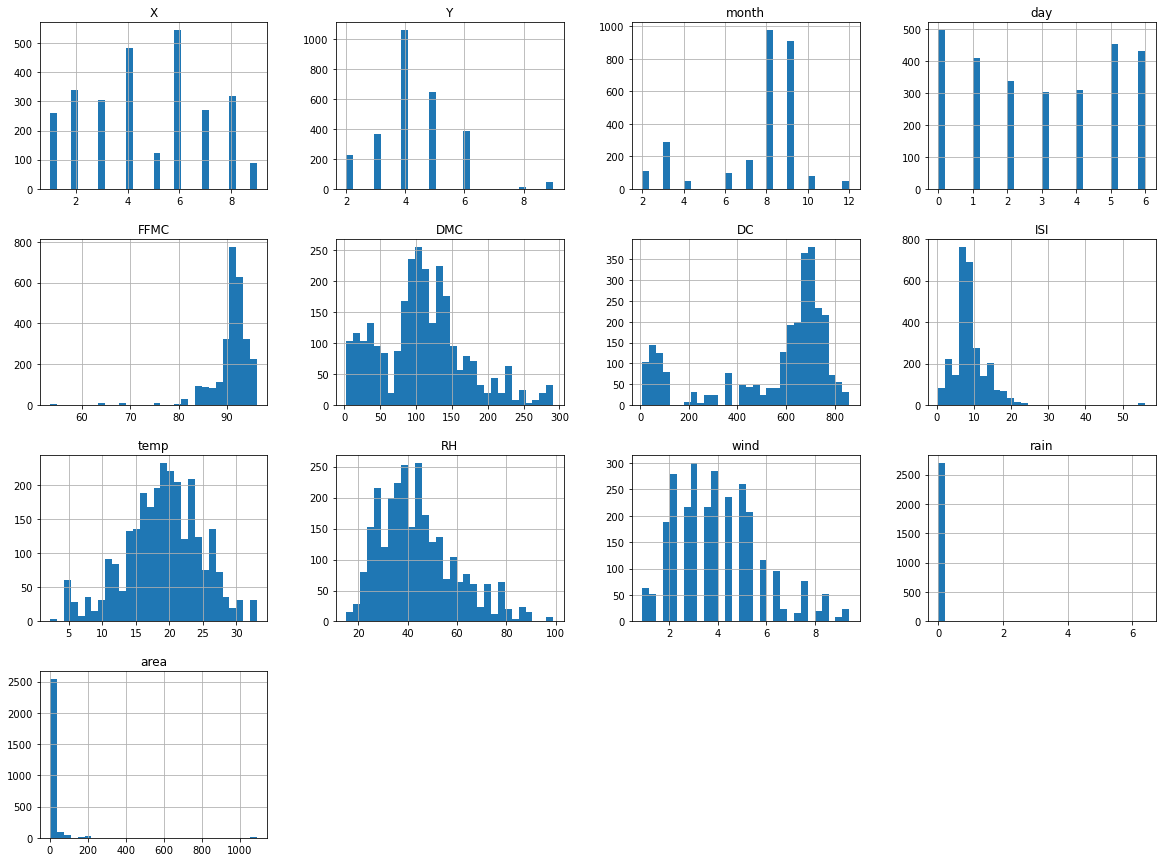

In [53]:
train_df.hist(bins=30, figsize=(20,15))

In [ ]:
# gen test
# description: fictional yearly data from 2016-2020
# 1. 680 rows (each yr has ave of 170 rows(fire instances), so 4 yrs = 680 rows)
# 2. make use of random_state attribute in pd.sample method
# 3. no zero valued area rows = student acc increases if they don't train on zero area rows
# 4. student acc increases if they take into account month bias in final model
# 5. student acc increases if they take into account mid distribution bias


In [ ]:
# gen val1&2
# description:
#    val1: used to express the test set's 65% month bias to Aug, Sep, Mar
#         1. 200 rows, 65% from top 3 months in test set, 35% from train set other months
#    val2: used to express the test set's middle distribution bias
#         1. 200 rows, 65% from mid of test ditribution, 35% from train high low distribution
#            ends.
